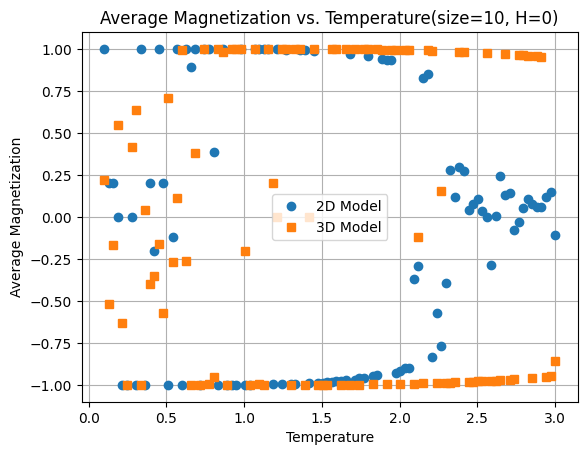

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

class IsingModel3D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        # Initialize spins in a 3D grid
        self.spins = np.random.choice([-1, 1], size=(size, size, size))

    def calculate_energy_change(self, i, j, k):
        # Compute neighbors using periodic boundary conditions
        top = self.spins[(i-1) % self.size, j, k]
        bottom = self.spins[(i+1) % self.size, j, k]
        left = self.spins[i, (j-1) % self.size, k]
        right = self.spins[i, (j+1) % self.size, k]
        up = self.spins[i, j, (k-1) % self.size]
        down = self.spins[i, j, (k+1) % self.size]

        neighbor_sum = top + bottom + left + right + up + down

        # Calculate energy change considering exchange interaction and external field
        delta_energy = 2 * self.spins[i, j, k] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        # Attempt to flip each spin in the grid once per step
        for _ in range(self.size ** 3):  # Size cubed iterations for a 3D lattice
            i, j, k = random.randint(0, self.size-1), random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j, k)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j, k] *= -1

    def simulate(self, steps, equilibration_steps):
        magnetizations = []
        for step in range(steps + equilibration_steps):
            self.metropolis_step()
            if step >= equilibration_steps:  # Calculate magnetization after equilibration steps
                total_magnetization = np.sum(self.spins)
                magnetization_per_spin = total_magnetization / (self.size ** 3)
                magnetizations.append(magnetization_per_spin)
        return magnetizations

class IsingModel2D:
    def __init__(self, size, temperature, external_field, exchange_interaction):
        self.size = size
        self.temperature = temperature
        self.external_field = external_field
        self.exchange_interaction = exchange_interaction
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def calculate_energy_change(self, i, j):
        top = self.spins[(i-1)%self.size, j]
        bottom = self.spins[(i+1)%self.size, j]
        left = self.spins[i, (j-1)%self.size]
        right = self.spins[i, (j+1)%self.size]
        neighbor_sum = top + bottom + left + right

        # Calculate energy change considering exchange interaction and external field
        delta_energy = 2 * self.spins[i, j] * (self.exchange_interaction * neighbor_sum + self.external_field)
        return delta_energy

    def metropolis_step(self):
        for _ in range(self.size**2):  # Try each spin in the grid once
            i, j = random.randint(0, self.size-1), random.randint(0, self.size-1)
            delta_energy = self.calculate_energy_change(i, j)
            if delta_energy < 0 or random.random() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps, equilibration_steps):
            magnetizations = []
            
            for step in range(steps+equilibration_steps):
                self.metropolis_step()
                if step >= equilibration_steps:  # Calculate magnetization after equilibration steps
                    total_magnetization = np.sum(self.spins)
                    magnetization_per_spin = total_magnetization / (self.size**2)
                    magnetizations.append(magnetization_per_spin)
            return magnetizations

# Simulation parameters
size = 10
temperatures = np.linspace(0.1, 3.0, 100)
external_field = 0  # External magnetic field
exchange_interaction = 1  # Exchange interaction constant
steps = 1000
equilibration_steps = 100

magnetizations_2D = []
magnetizations_3D = []

for temperature in temperatures:
    model_2D = IsingModel2D(size, temperature, external_field, exchange_interaction)
    magnetizations = model_2D.simulate(steps, equilibration_steps)
    avg_magnetization_2D = np.mean(magnetizations)
    magnetizations_2D.append(avg_magnetization_2D)

    model_3D = IsingModel3D(size, temperature, external_field, exchange_interaction)
    magnetizations = model_3D.simulate(steps, equilibration_steps)
    avg_magnetization_3D = np.mean(magnetizations)
    magnetizations_3D.append(avg_magnetization_3D)

# Plotting the graph
plt.plot(temperatures, magnetizations_2D, marker='o', linestyle='none', label='2D Model')
plt.plot(temperatures, magnetizations_3D, marker='s', linestyle='none', label='3D Model')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature(size=10, H=0)')
plt.grid(True)
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 3D Ising model
L = 10  # Linear size of the lattice
num_steps = 1000  # Number of Monte Carlo steps
equil_steps = 500  # Steps to equilibrate
J = 1.0  # Interaction strength
k_B = 1.0  # Boltzmann constant

# Initialize a random spin configuration (+1 or -1)
spins = np.random.choice([-1, 1], size=(L, L, L))

def magnetization(spins):
    """Calculate the magnetization of the spin configuration."""
    return np.sum(spins)

def energy(spins):
    """Calculate the energy of the spin configuration."""
    E = 0
    for i in range(L):
        for j in range(L):
            for k in range(L):
                S = spins[i, j, k]
                # Sum over nearest neighbors with periodic boundary conditions
                nb = spins[(i+1)%L, j, k] + spins[i, (j+1)%L, k] + spins[i, j, (k+1)%L] + \
                     spins[(i-1)%L, j, k] + spins[i, (j-1)%L, k] + spins[i, j, (k-1)%L]
                E += -J * S * nb
    return E / 2  # Each pair counted twice

# Monte Carlo simulation using Metropolis algorithm
def monte_carlo_step(spins, T):
    """Perform one Monte Carlo step using the Metropolis algorithm."""
    for _ in range(L**3):
        i, j, k = np.random.randint(0, L, size=3)
        S = spins[i, j, k]
        nb = spins[(i+1)%L, j, k] + spins[i, (j+1)%L, k] + spins[i, j, (k+1)%L] + \
             spins[(i-1)%L, j, k] + spins[i, (j-1)%L, k] + spins[i, j, (k-1)%L]
        dE = 2 * J * S * nb
        if dE < 0 or np.random.rand() < np.exp(-dE / (k_B * T)):
            spins[i, j, k] = -S

# Temperature range
T_min, T_max = 0.1, 4.0
T_steps = 20
temperatures = np.linspace(T_min, T_max, T_steps)

# Initialize magnetization list
magnetization_list = []

# Perform the simulation over a range of temperatures
for T in temperatures:
    # Reinitialize the spins for each temperature
    spins = np.random.choice([-1, 1], size=(L, L, L))
    
    # Equilibrate the system
    for step in range(equil_steps):
        monte_carlo_step(spins, T)
    
    # Measure the magnetization
    mag = 0
    for step in range(num_steps):
        monte_carlo_step(spins, T)
        mag += np.abs(magnetization(spins))
    magnetization_list.append(mag / num_steps / (L**3))

# Plot the magnetization as a function of temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, magnetization_list, marker='o', linestyle='-', color='b', label='Magnetization')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs. Temperature for 3D Ising Model')
plt.legend()
plt.grid(True)
plt.show()
